In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

In [4]:
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32')/255.0

In [5]:
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\hyper\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test,y_test))

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.1577 - loss: 2.2436 - val_accuracy: 0.1968 - val_loss: 2.1796
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3046 - loss: 1.9338 - val_accuracy: 0.2911 - val_loss: 1.8662
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.3875 - loss: 1.7177 - val_accuracy: 0.3970 - val_loss: 1.6238
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.4428 - loss: 1.5602 - val_accuracy: 0.4350 - val_loss: 1.6063
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.4811 - loss: 1.4594 - val_accuracy: 0.4838 - val_loss: 1.4420
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5046 - loss: 1.3862 - val_accuracy: 0.3903 - val_loss: 1.8231
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5358 - loss: 1.3138 - val_accuracy: 0.5352 - val_loss: 1.2939
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5579 - loss: 1.2585 - 

In [9]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.5287 - loss: 1.3966


In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
img = np.expand_dims(x_test[0],axis=0)
pred = model.predict(img)
pred_class = np.argmax(pred)

print(class_names[pred_class])
print(class_names[np.argmax(y_test[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
dog
cat


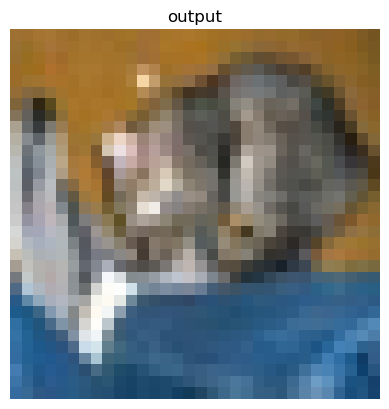

In [12]:
plt.imshow(x_test[0])
plt.title("output")
plt.axis('off')
plt.show()